## Step 4

In [1]:
from scipy import ndimage

import matplotlib.pyplot as plt
import numpy as np

real_pandas = ndimage.imread('panda-mania-12.jpg')

plt.imshow(real_pandas)
#plt.imshow(gray_img, cmap=plt.cm.gray)

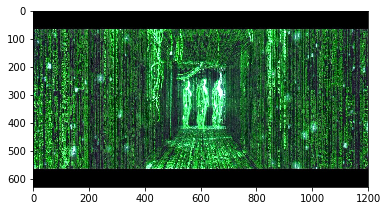

In [2]:
data = ndimage.imread('data-behind-everything.jpg')
plt.imshow(data)

In [3]:
def convert_to_grayscale(image, crop_left, crop_top, crop_right, crop_bottom, contrast_scale):
    #Cropping: you should crop the image appropriately according to the 
    #crop_left, crop_top, crop_right, and crop_bottom parameters.
    crop_image = image[crop_top:-crop_bottom, crop_left:-crop_right]
    
    #Converting to grayscale: you should average (compute the mean) of the (R, G, B) values associated with each pixel.  
    #For example, an RGB pixel (100, 108, 104) would become the single grayscale value 104.  
    #This has the effect of reducing the dimension of the image array from 3D (color image) to 2D (grayscale image).
    new_gray = np.zeros((crop_image.shape[0],crop_image.shape[1]))
    for i in range(crop_image.shape[0]):
        for j in range(crop_image.shape[1]):
            new_gray[i,j] = np.mean(crop_image[i,j])
            
    
    #Increasing contrast:you should first compute the median grayscale pixel value across the entire image.  
    #For every pixel with value below the median, scale its grayscale value down by the percentage specified in 
    #contrast_scale (which should be a real value from 0 to 1).  For every pixel with value above the median, 
    #scale its grayscale value up by the percentage specified in contrast_scale.  A contrast_scale of 0 corresponds 
    #to not changing the grayscale pixel values at all.
    #Do not let grayscale values fall outside of the range [0, 255]; you may need to threshold them.
    
    median = np.median(new_gray)
    if contrast_scale > 0:
        for i in range(len(new_gray)):
            for j in range(len(new_gray[0])):
                if new_gray[i,j] > median:
                    new_gray[i,j] = new_gray[i,j]*(1+contrast_scale)
                    if new_gray[i,j] > 255:
                        new_gray[i,j] = 255
                if new_gray[i,j] < median:
                    new_gray[i,j] = new_gray[i,j]*(1-contrast_scale)
                    if new_gray[i,j] < 0:
                        new_gray[i,j] = 0
                        
                        
    return new_gray
    


In [6]:
gray_data = convert_to_grayscale(data, 10, 50, 10, 50, 0.3)

In [7]:
#test = np.zeros((gray_data.shape[0],gray_data.shape[1]))
#range(len(test))

gray_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

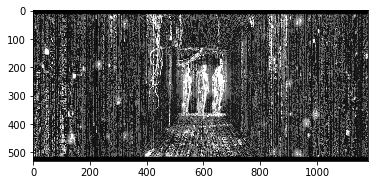

In [8]:
plt.imshow(gray_data, cmap=plt.cm.gray)